In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xlrd
girl, boy = np.loadtxt(fname='girl.txt'),np.loadtxt('boy.txt')
girlY, boyY =np.ones(girl.shape[0]), np.zeros(165)
X, Y = np.vstack((boy, girl)), np.hstack((boyY, girlY))
sheet = xlrd.open_workbook("fm_2018.xlsx").sheets()[0]
X1,X2,X3= sheet.col_values(0),sheet.col_values(1),sheet.col_values(2)
X_test = np.array([X1,X2,X3]).T
X_test, y_test = X_test[1:,:], np.array(sheet.col_values(3))[1:]
y_test = np.array(y_test=="女",dtype="float64")
X_test, Y = X_test.astype("float64"), Y.astype('float64')

In [9]:
from sklearn.naive_bayes import GaussianNB
def bayers_2d(i, j):    
    models = (GaussianNB(priors = [0.1, 0.9]),
               GaussianNB(priors=[0.5,0.5]),
                GaussianNB(priors=[0.75,0.25]),
                GaussianNB(priors=[0.25,0.75])) 
    X_2d = np.vstack((X[:,i],X[:,j])).T
    X_test_2d = np.vstack((X_test[:,i],X_test[:,j])).T
    models = [clf.fit(X_2d, Y) for clf in models]
    # scores
    scores = [model.score(X_test_2d, y_test) for model in models]
    print("R_squre")
    print(scores)
    s = [sum(model.predict(X_test_2d)==y_test)/len(y_test) for model in models]
    print("accuracy")
    print(s)
    # title for the plots
    titles = ('priors = [0.1, 0.9]',
              'priors=[0.5,0.5]',
              'priors=[0.25,0.75]',
              'priors=[0.75,0.25]')
    labels = ("height","weight","size of feet")
    fig, sub = plt.subplots(2, 2)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from playML.metrics import plot_decision_boundary
    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_decision_boundary(ax, clf, X_test_2d, h=1)
        ax.scatter(X_test_2d[:,0], X_test_2d[:,1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')  
        ax.set_xlabel(labels[i])
        ax.set_ylabel(labels[j])
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)
    
    
    fig, sub = plt.subplots(1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    from playML.metrics import roc
    from sklearn.metrics import roc_curve
    fprs = []
    tprs = []
    decision_scores = clf.predict_log_proba(X_test_2d)
    decision_scores=decision_scores[:,0]-decision_scores[:,1]
#     fprs, tprs,_  = roc(decision_scores, y_test)
    tprs, fprs,_  = roc_curve(y_test, decision_scores)
    sub.plot(fprs, tprs)
    sub.set_xlabel("fprs")
    sub.set_ylabel("tprs")
    sub.set_xticks(())
    sub.set_yticks(())
    sub.set_title(title)

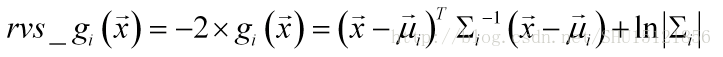-2lnP(w_i)

R_squre
[0.8837209302325582, 0.8372093023255814, 0.8372093023255814, 0.8837209302325582]
accuracy
[0.8837209302325582, 0.8372093023255814, 0.8372093023255814, 0.8837209302325582]
R_squre
[0.9534883720930233, 0.9534883720930233, 0.9302325581395349, 0.9767441860465116]
accuracy
[0.9534883720930233, 0.9534883720930233, 0.9302325581395349, 0.9767441860465116]
R_squre
[0.9069767441860465, 0.9069767441860465, 0.8837209302325582, 0.9302325581395349]
accuracy
[0.9069767441860465, 0.9069767441860465, 0.8837209302325582, 0.9302325581395349]


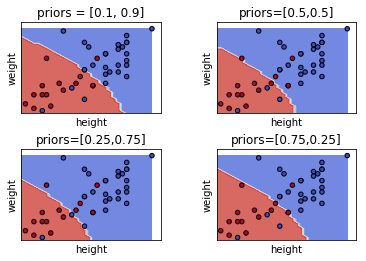

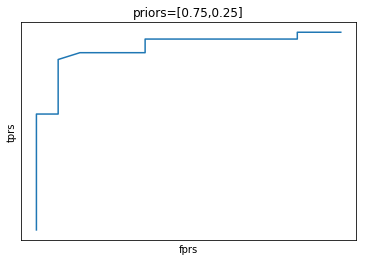

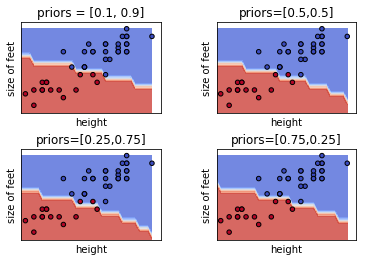

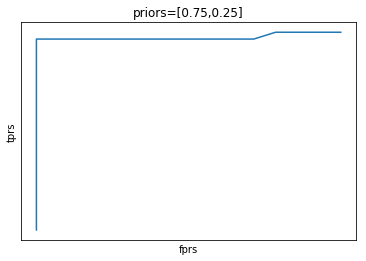

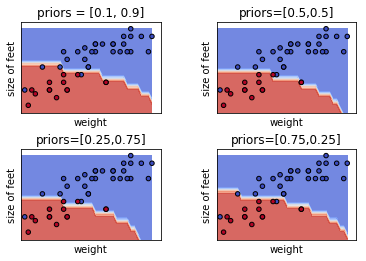

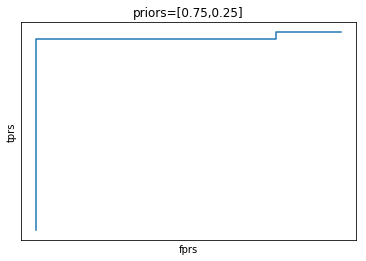

In [10]:
bayers_2d(0,1)
bayers_2d(0,2)
bayers_2d(1,2)